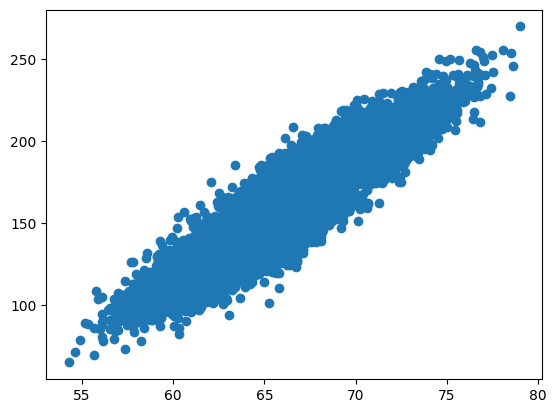

In [2]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('weight-height.csv')
plt.scatter(x = df['Height'], y = df['Weight'])
df.drop(['Gender'] , axis = 1, inplace = True)

In [3]:
# divide the datset into independent and dependent feature
x = df[['Weight']] # independent feature
y = df[['Height']] # dependant feature

from sklearn.model_selection import train_test_split # split dataset to train and test data set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [4]:
# standardize the independent dataset of train data
from sklearn.preprocessing import StandardScaler # divide the datset into independent and dependent feature
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Train the simple linear regression model
from sklearn.linear_model import LinearRegression # create an object of the class LinearRegression() from sklearn
regressor = LinearRegression()# fit the model with train data set as independent variable and dependent variable is height
regressor.fit(X_train, y_train)

LinearRegression()

In [6]:
regressor.coef_,regressor.intercept_

(array([[3.55479288]]), array([66.35968141]))

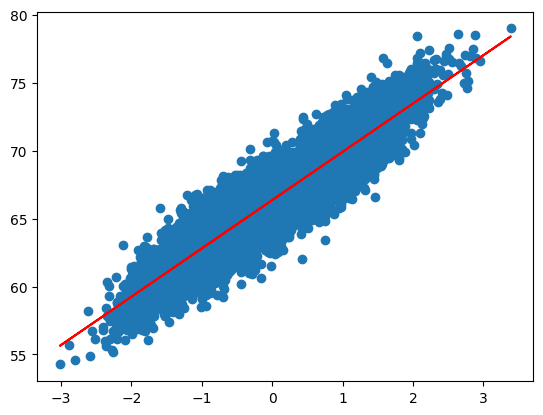

In [15]:
from turtle import color


plt.scatter(x=X_train,y=y_train)
plt.plot(X_train,regressor.predict(X_train),color='red')

In [7]:
y_pred_test = regressor.predict(X_test)


In [12]:
# Performance Metrics
# MSE, MAE, RMSE
# R Squared and Adjusted R Squared
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
print('Mean Square Error 	:',mean_squared_error(y_test, y_pred_test))
print('Mean Absolute Error :',mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error :',root_mean_squared_error(y_test, y_pred_test))
print('R Square :',r2_score(y_test, y_pred_test))

score = r2_score(y_test, y_pred_test)
adjusted_r2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R Squared :',adjusted_r2)

Mean Square Error 	: 2.112361948474147
Mean Absolute Error : 1.1588656330992098
Root Mean Squared Error : 1.4533966934303062
R Square : 0.8578120230894554
Adjusted R Squared : 0.8577408579358465


In [ ]:
# prediciting for new data
scaled_weight = scaler.transform([[50],[90]]) # weight inputs
print(regressor.predict(scaled_weight))

[[54.00873123]
 [58.44646028]]


c:\Users\Admin\Documents\GitHub\Data_Science\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(array([ 1.,  0.,  0.,  0.,  2.,  2.,  1.,  0.,  1.,  2.,  2.,  1.,  0.,
         2.,  2.,  2.,  6.,  4.,  5.,  6.,  3.,  6.,  8., 10., 13., 11.,
        12., 19., 25., 15., 27., 30., 36., 35., 30., 36., 37., 48., 53.,
        47., 47., 58., 55., 47., 59., 44., 42., 52., 61., 75., 67., 52.,
        58., 49., 65., 60., 58., 42., 55., 38., 38., 37., 42., 35., 28.,
        24., 27., 16., 14., 15., 20., 12.,  4., 12.,  7.,  6.,  3.,  5.,
         5.,  3.,  6.,  6.,  2.,  2.,  1.,  2.,  1.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-5.28440687, -5.17558157, -5.06675626, -4.95793096, -4.84910566,
        -4.74028036, -4.63145505, -4.52262975, -4.41380445, -4.30497914,
        -4.19615384, -4.08732854, -3.97850324, -3.86967793, -3.76085263,
        -3.65202733, -3.54320202, -3.43437672, -3.32555142, -3.21672612,
        -3.10790081, -2.99907551, -2.89025021, -2.78142491, -2.6725996 ,
        -2.5637743 , -2.454949  , -2.34612369, -2.23729839, -2.128473

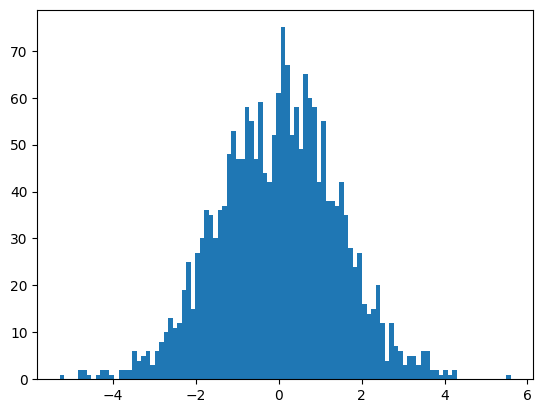

In [26]:
# Assumptions for Linear Regression
# 1 plot of y_test vs y_pred_test should show  linear relationship
# 2. residuals should be normally distributed with mean 0 and standard deviation equal to the square root of variance


residual = y_test - y_pred_test
plt.hist(residual, bins = 100)